In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Upload the CSV file
from google.colab import files
uploaded = files.upload()

Saving Healthcare Providers.csv to Healthcare Providers.csv


In [3]:
# Load the uploaded CSV file
df = pd.read_csv('Healthcare Providers.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows of the Dataset:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  obje

In [4]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                               

In [5]:
# Dropping columns with excessive missing values
df = df.drop(columns=['Street Address 2 of the Provider', 'Middle Initial of the Provider'])

# Fill missing values for categorical columns with 'Unknown'
df['Credentials of the Provider'] = df['Credentials of the Provider'].fillna('Unknown')
df['Gender of the Provider'] = df['Gender of the Provider'].fillna('Unknown')

# Convert necessary columns to numeric, handling errors where needed
numerical_columns = [
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
    'Zip Code of the Provider',
]
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nData cleaning completed.")


Data cleaning completed.


# **1. Provider Demographics and Behaviour**

## **i. Provider Type Distribution**

Provider Type
Diagnostic Radiology                                12537
Internal Medicine                                   11366
Family Practice                                      9760
Nurse Practitioner                                   5713
Cardiology                                           4602
                                                    ...  
Certified Nurse Midwife                                 7
Mammography Center                                      3
Radiation Therapy Center                                3
Pharmacy                                                1
Advanced Heart Failure and Transplant Cardiology        1
Name: count, Length: 90, dtype: int64


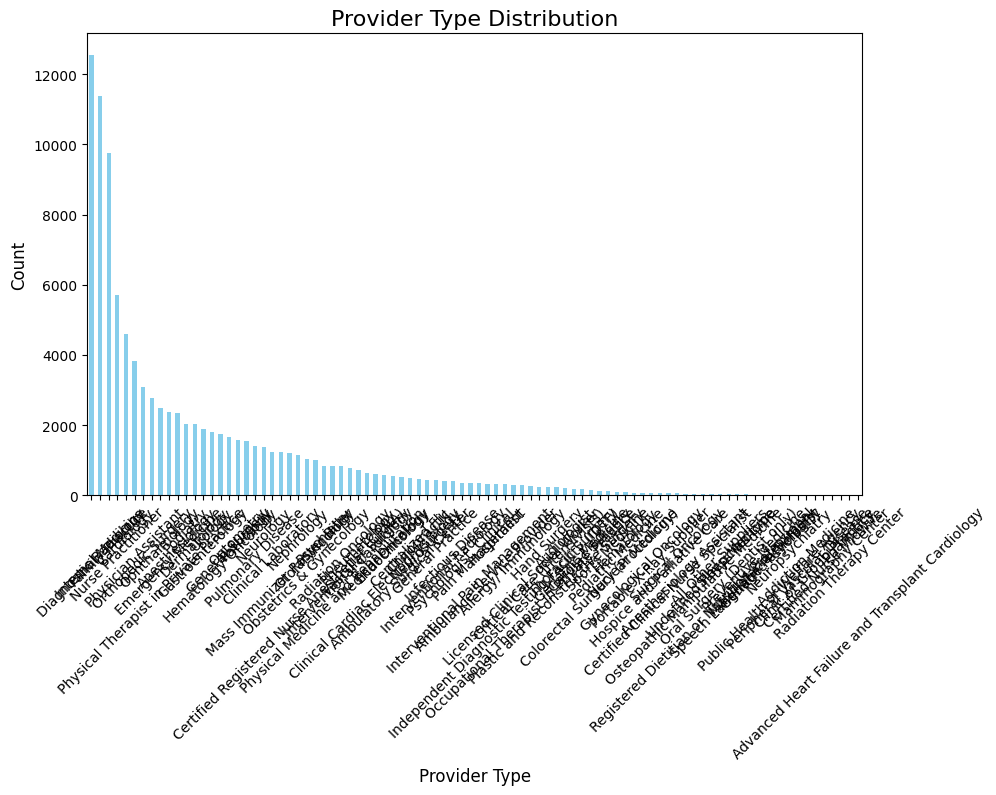

In [39]:
# Count the occurrences of each provider type
provider_counts = df['Provider Type'].value_counts()

# Print the count of each provider type for review
print(provider_counts)

# Visualizing the distribution of provider types using a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size for the plot

# Create the bar chart, using sky blue color for the bars
provider_counts.plot(kind='bar', color='skyblue')

# Set the title and labels for the plot
plt.title('Provider Type Distribution', fontsize=16)
plt.xlabel('Provider Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the bar chart
plt.show()

## **ii. Gender Analysis**

<ipython-input-41-e27d2d408492>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender of the Provider', palette='viridis')


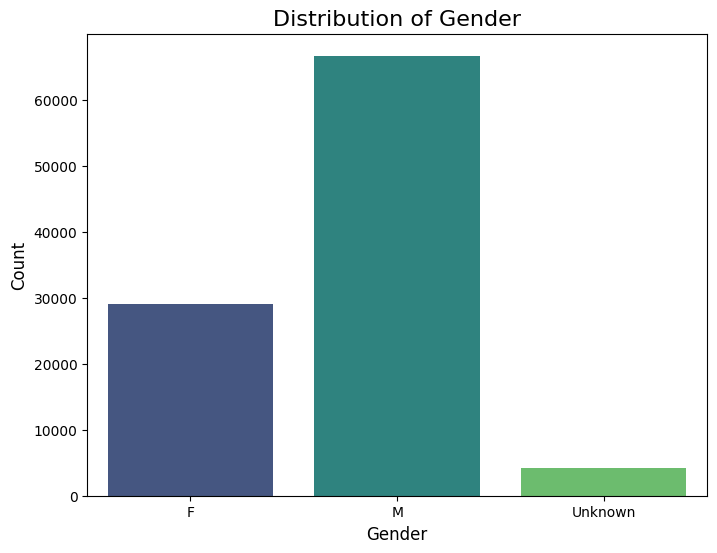

In [41]:
# Distribution of Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender of the Provider', palette='viridis')
plt.title('Distribution of Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# **2. Geographic Insights**

## **i. Statewise Distribution**

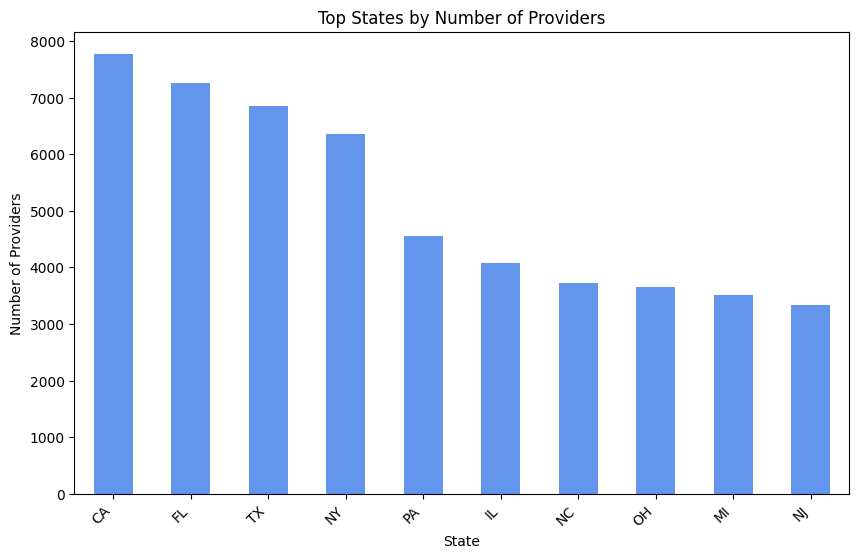

In [17]:
# Count the number of providers in each state
state_counts = df['State Code of the Provider'].value_counts()

# Select the top 10 states with the highest number of providers
top_states = state_counts.head(10)

# Plotting a bar chart for the top 10 states by the number of providers
plt.figure(figsize=(10, 6))  # Set the figure size
top_states.plot(kind='bar', color='cornflowerblue')  # Create the bar chart
plt.title('Top States by Number of Providers')  # Add a title to the chart
plt.xlabel('State')  # Label the x-axis
plt.ylabel('Number of Providers')  # Label the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.show()  # Display the plot

## **ii. Citywise Distribution**

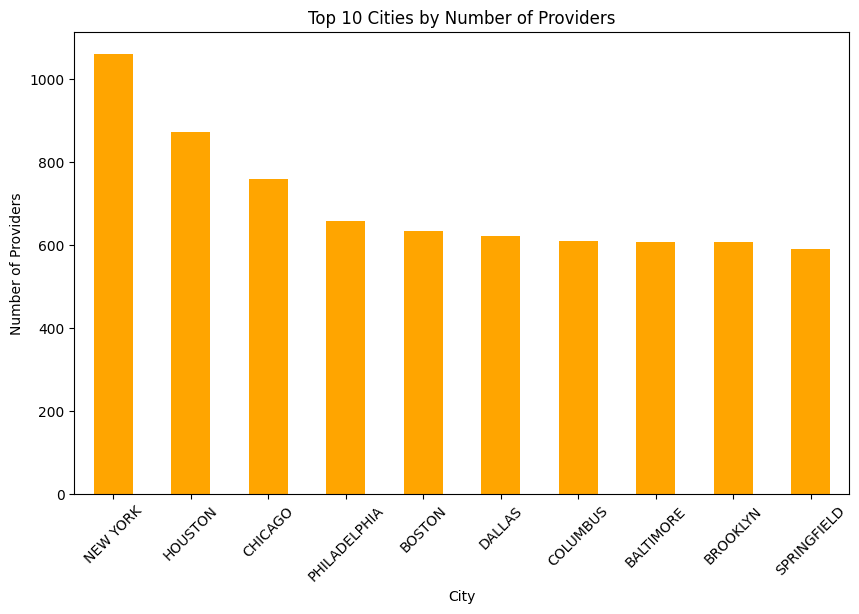

In [18]:
# Count the number of providers in each city
city_counts = df['City of the Provider'].value_counts()

# Select the top 10 cities with the highest number of providers
top_cities = city_counts.head(10)

# Plotting a bar chart for the top 10 cities by the number of providers
plt.figure(figsize=(10, 6))  # Set the figure size
top_cities.plot(kind='bar', color='orange')  # Create the bar chart with orange color
plt.title('Top 10 Cities by Number of Providers')  # Add a title to the chart
plt.xlabel('City')  # Label the x-axis
plt.ylabel('Number of Providers')  # Label the y-axis
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()  # Display the plot

## **iii. Heatmap for Statewise Provider and Payment Metrics**

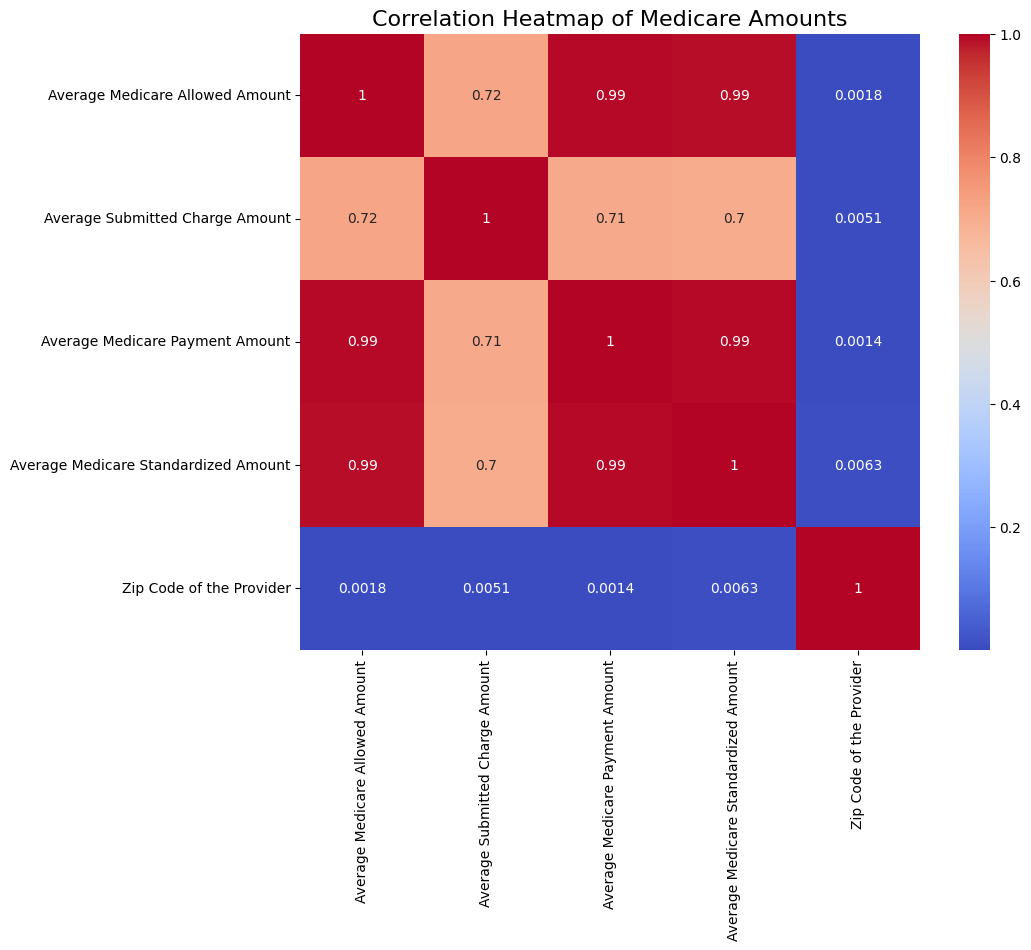

In [19]:
# Visualization 3: Correlation Heatmap
plt.figure(figsize=(10, 8))  # Set the figure size

# Filter numerical columns to include only those without missing values
numerical_columns_clean = [col for col in numerical_columns if df[col].notnull().sum() > 0]

# Create a heatmap showing correlations between numerical columns
sns.heatmap(df[numerical_columns_clean].corr(), annot=True, cmap='coolwarm')

# Add a title to the heatmap
plt.title('Correlation Heatmap of Medicare Amounts', fontsize=16)

# Display the heatmap
plt.show()

# **3. Financial Performance**

## **i. Charge vs Payment Discrepancies**

<ipython-input-25-c4a808f79174>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Charge-to-Payment Ratio'] = (


Summary of Charge-to-Payment Ratio:
count    90664.000000
mean         4.784744
std         19.587803
min          0.883623
25%          2.242748
50%          3.260785
75%          4.838128
max       2676.153842
Name: Charge-to-Payment Ratio, dtype: float64


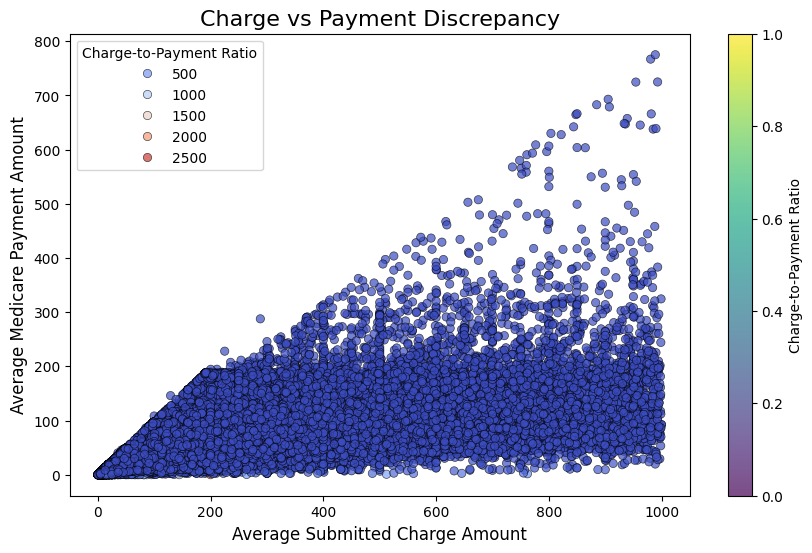

In [25]:
# Convert relevant columns to numeric
numeric_columns = [
    "Number of Services",
    "Average Medicare Payment Amount",
    "Average Submitted Charge Amount",
    "Average Medicare Allowed Amount",
]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert columns to numeric

# Drop rows with missing data in the specified numeric columns
df_cleaned = df.dropna(subset=numeric_columns)

# Calculate the charge-to-payment ratio
df_cleaned['Charge-to-Payment Ratio'] = (
    df_cleaned['Average Submitted Charge Amount'] / df_cleaned['Average Medicare Payment Amount']
)

# Display summary statistics for charge-to-payment ratio
discrepancy_summary = df_cleaned['Charge-to-Payment Ratio'].describe()
print("Summary of Charge-to-Payment Ratio:")
print(discrepancy_summary)

# Scatter plot: Average Submitted Charge Amount vs Average Medicare Payment Amount
plt.figure(figsize=(10, 6))
# Assign the scatter plot to a variable to allow colorbar association
scatter = sns.scatterplot(
    data=df_cleaned,
    x='Average Submitted Charge Amount',
    y='Average Medicare Payment Amount',
    hue='Charge-to-Payment Ratio',
    palette='coolwarm',
    edgecolor='k',
    alpha=0.7
)
plt.title('Charge vs Payment Discrepancy', fontsize=16)
plt.xlabel('Average Submitted Charge Amount', fontsize=12)
plt.ylabel('Average Medicare Payment Amount', fontsize=12)
# Associate the colorbar with the scatter plot using the 'ax' argument
plt.colorbar(scatter.collections[0], label='Charge-to-Payment Ratio')
plt.show()


## **ii. Service Cost Distribution**

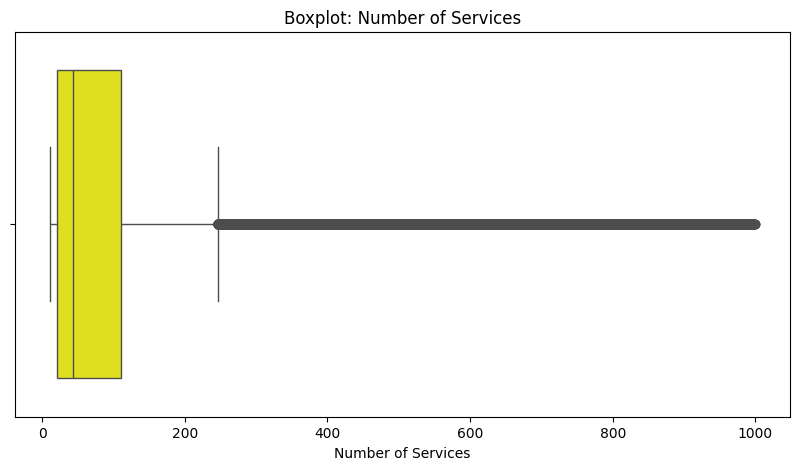

In [38]:
# Function to calculate and detect outliers using the Interquartile Range (IQR) method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Calculate the first quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Calculate the third quartile (75th percentile)
    IQR = Q3 - Q1  # Calculate the interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Define the lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Define the upper bound for outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]  # Identify outliers
    return outliers

# Detect outliers in "Number of Services" using the IQR method
service_outliers = detect_outliers_iqr(df_cleaned, "Number of Services")

# Detect outliers in "Average Medicare Payment Amount" using the IQR method
payment_outliers = detect_outliers_iqr(df_cleaned, "Average Medicare Payment Amount")

# Visualization: Boxplot for "Number of Services" to identify outliers
plt.figure(figsize=(10, 5))  # Set the figure size
sns.boxplot(x=df_cleaned["Number of Services"], color='yellow')  # Create the boxplot with yellow color
plt.title("Boxplot: Number of Services")  # Add a title to the plot
plt.xlabel("Number of Services")  # Label the x-axis
plt.show()  # Display the plot

## **iii. Distribution of Medicare Payments**

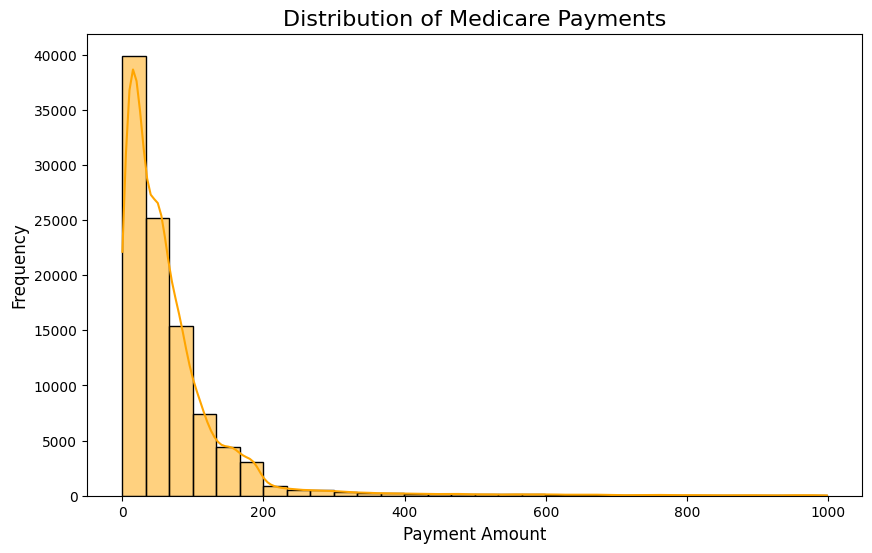

In [27]:
# Distribution of Medicare Payments
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot a histogram with a kernel density estimate (KDE) for Medicare payments
sns.histplot(df['Average Medicare Payment Amount'], bins=30, kde=True, color='orange')

# Add a title to the plot
plt.title('Distribution of Medicare Payments', fontsize=16)

# Label the x-axis and y-axis
plt.xlabel('Payment Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

# **4. Anamoly Detection**

## **i. Top 10 HCPCS Code**

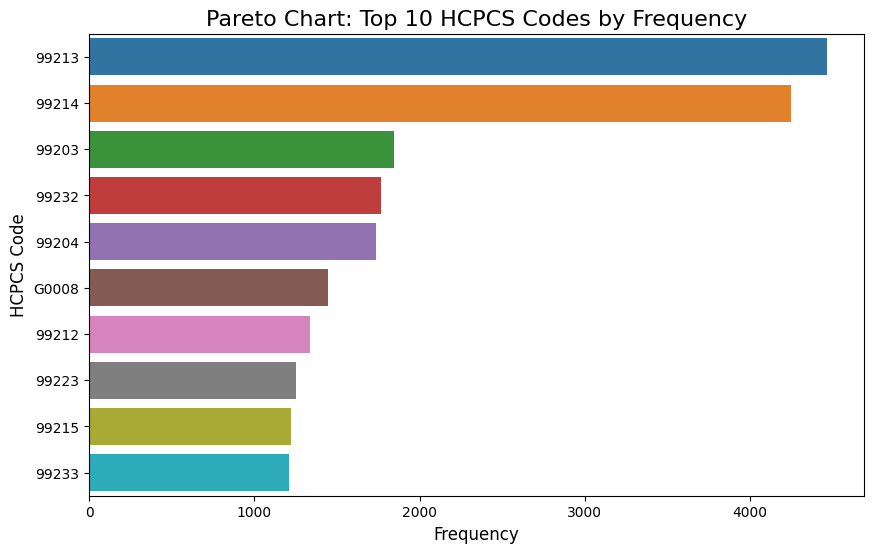

In [37]:
# Extract the top 10 HCPCS codes based on frequency
hcpcs_counts = df_cleaned["HCPCS Code"].value_counts().head(10)

# Plotting a Pareto chart for the top 10 HCPCS codes
plt.figure(figsize=(10, 6))  # Set figure size for better visualization
sns.barplot(
    x=hcpcs_counts.values,  # Frequency of HCPCS codes
    y=hcpcs_counts.index,   # HCPCS code names
    hue=hcpcs_counts.index, # Use HCPCS codes as hue for better distinction
    dodge=False,            # Prevent bar separation by category
    legend=False            # Disable legend as hue is repetitive
)
plt.title("Pareto Chart: Top 10 HCPCS Codes by Frequency", fontsize=16)  # Add chart title
plt.xlabel("Frequency", fontsize=12)  # Label the x-axis
plt.ylabel("HCPCS Code", fontsize=12)  # Label the y-axis
plt.show()  # Display the chart

## **ii. Outliers**

In [33]:
# Print a summary of service outliers
print("Service Outliers Summary:")
# Display first 5 outliers for HCPCS Code and Number of Services
print(service_outliers[["HCPCS Code", "Number of Services"]].head())

# Print a summary of payment outliers
print("\nPayment Outliers Summary:")
# Display first 5 outliers for HCPCS Code and Average Medicare Payment Amount
print(payment_outliers[["HCPCS Code", "Average Medicare Payment Amount"]].head())

Service Outliers Summary:
   HCPCS Code  Number of Services
16      99213               364.0
22      43239               272.0
30      99309               552.0
36      87350               542.0
61      11042               545.0

Payment Outliers Summary:
    HCPCS Code  Average Medicare Payment Amount
13       99291                       192.630377
26       90670                       183.587917
73       93880                       173.960909
103      93306                       166.448069
195      90960                       206.578205


# **5. Service Metrics**

## **i. Bubble Chart: Service vs Payment Relationship**

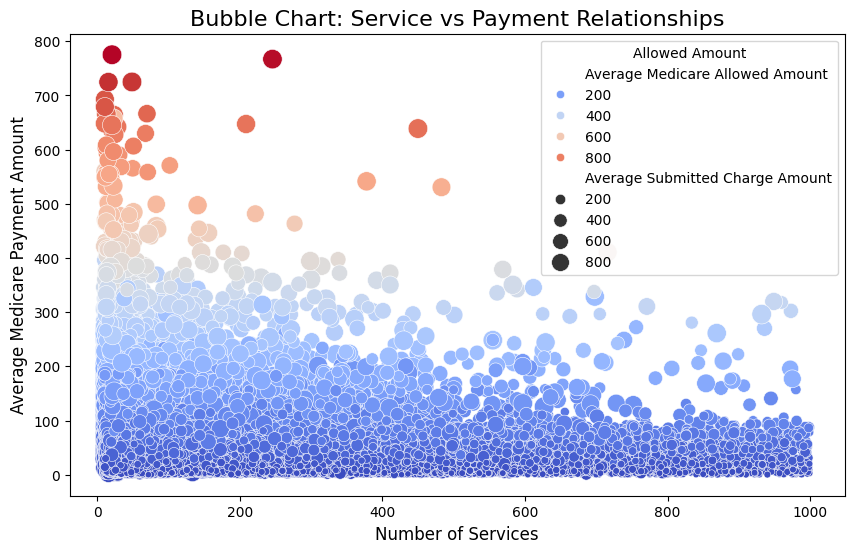

In [36]:
# Visualizing the relationship between service counts and financial metrics
plt.figure(figsize=(10, 6))  # Set figure size for the plot

# Create a bubble chart to represent the relationship
sns.scatterplot(
    data=df_cleaned,                               # Use cleaned data
    x="Number of Services",                        # X-axis: Number of Services
    y="Average Medicare Payment Amount",           # Y-axis: Average Medicare Payment Amount
    size="Average Submitted Charge Amount",        # Bubble size: Average Submitted Charge Amount
    hue="Average Medicare Allowed Amount",         # Bubble color: Based on Average Medicare Allowed Amount
    sizes=(20, 200),                               # Set the size range for the bubbles
    palette="coolwarm",                            # Color palette for bubble coloring
)

# Title and labels for the plot
plt.title("Bubble Chart: Service vs Payment Relationships", fontsize=16)
plt.xlabel("Number of Services", fontsize=12)
plt.ylabel("Average Medicare Payment Amount", fontsize=12)

# Add a legend for the "Allowed Amount" hue
plt.legend(title="Allowed Amount")

# Display the plot
plt.show()

## **ii. Boxplot for Number of Beneficiaries per Provider**

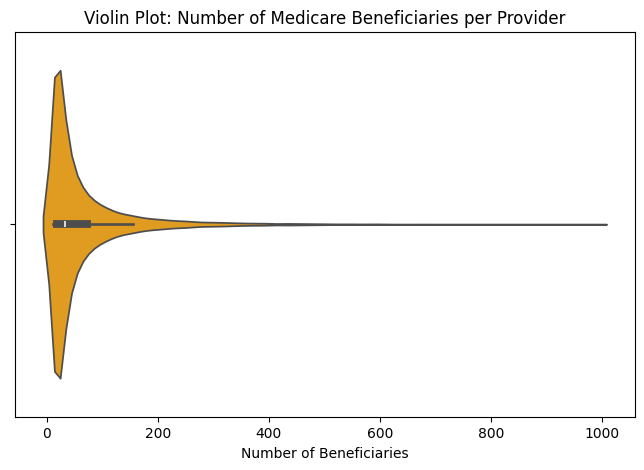

In [54]:
# Beneficiary Analysis: Spotting providers with unusually high/low beneficiaries
if "Number of Medicare Beneficiaries" in df_cleaned.columns:
    # Violin plot to visualize the distribution of beneficiaries
    plt.figure(figsize=(8, 5))
    sns.violinplot(x=df_cleaned["Number of Medicare Beneficiaries"], color="orange")
    plt.title("Violin Plot: Number of Medicare Beneficiaries per Provider")
    plt.xlabel("Number of Beneficiaries")
    plt.show()

# **6. Data Quality and Patterns**

## **i. Missing Data Patterns**

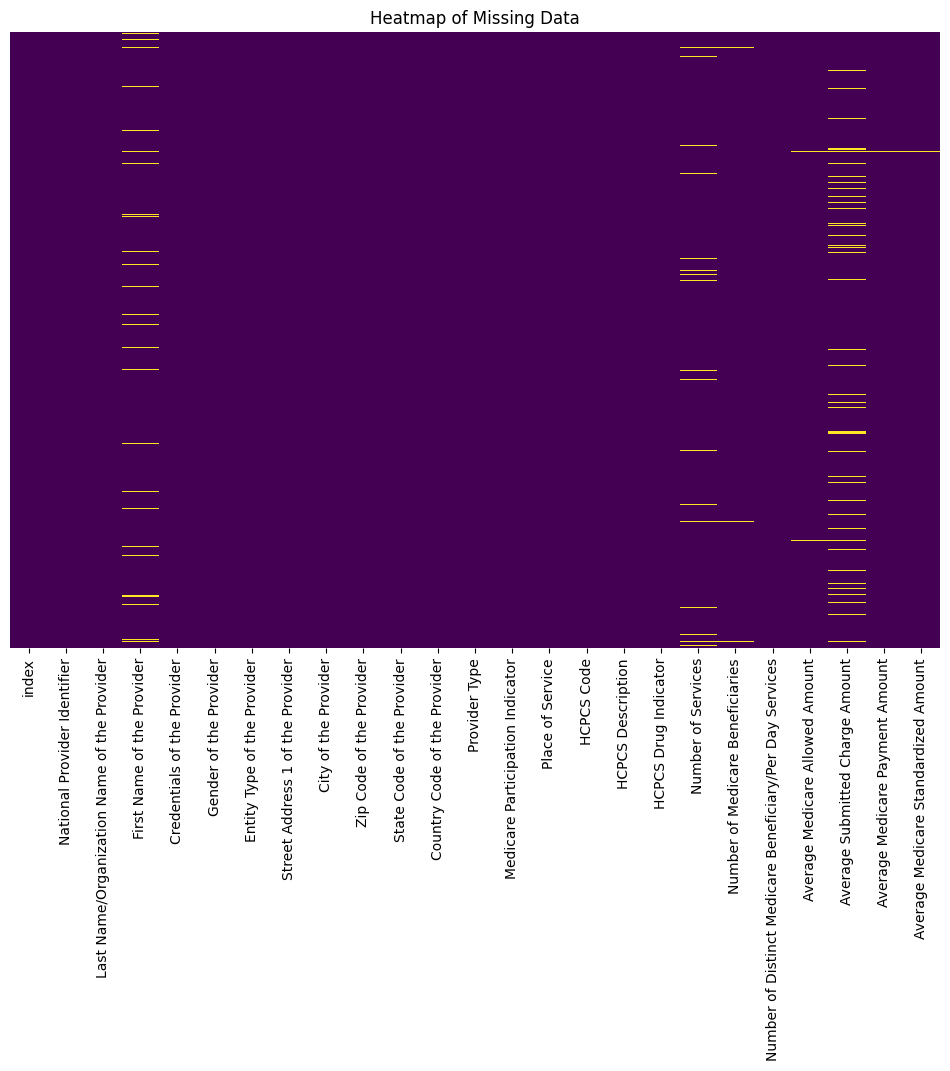

In [53]:
# Visualize patterns of missing data in the dataset
plt.figure(figsize=(12, 8))  # Set the figure size
# Create a heatmap to show missing values (True indicates missing data)
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
# Add a title to the heatmap
plt.title("Heatmap of Missing Data")
plt.show()  # Display the heatmap

In [55]:
# Checking for column names in the dataset
print("Columns in the dataset:")  # Displaying a message before printing column names
print(df.columns)  # Print all the column names in the dataframe

Columns in the dataset:
Index(['index', 'National Provider Identifier',
       'Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Credentials of the Provider',
       'Gender of the Provider', 'Entity Type of the Provider',
       'Street Address 1 of the Provider', 'City of the Provider',
       'Zip Code of the Provider', 'State Code of the Provider',
       'Country Code of the Provider', 'Provider Type',
       'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code',
       'HCPCS Description', 'HCPCS Drug Indicator', 'Number of Services',
       'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')


In [56]:
# Identifying duplicate rows based on specific columns (City and Provider's First Name)
duplicates = df[df.duplicated(subset=["City of the Provider", "First Name of the Provider"], keep=False)]

# Displaying the duplicate rows
print("Duplicate Rows Found:")  # Printing a message indicating duplicate rows will be displayed
print(duplicates.head())  # Displaying the first few duplicate rows for inspection

Duplicate Rows Found:
      index  National Provider Identifier  \
1   3354385                    1346202256   
5   3443985                    1346571551   
9   3900718                    1396781134   
11  7138229                    1720086507   
16  3642669                    1366846719   

   Last Name/Organization Name of the Provider First Name of the Provider  \
1                                        JONES                      WENDY   
5                                         PUGH                       JOHN   
9                                  METWEST INC                        NaN   
11                                   RODRIGUEZ                       ERIC   
16                                      ORREGO                      MARIA   

   Credentials of the Provider Gender of the Provider  \
1                         M.D.                      F   
5                          DPT                      M   
9                      Unknown                Unknown   
11              

## **ii. Cluster Map for Address Consistency**

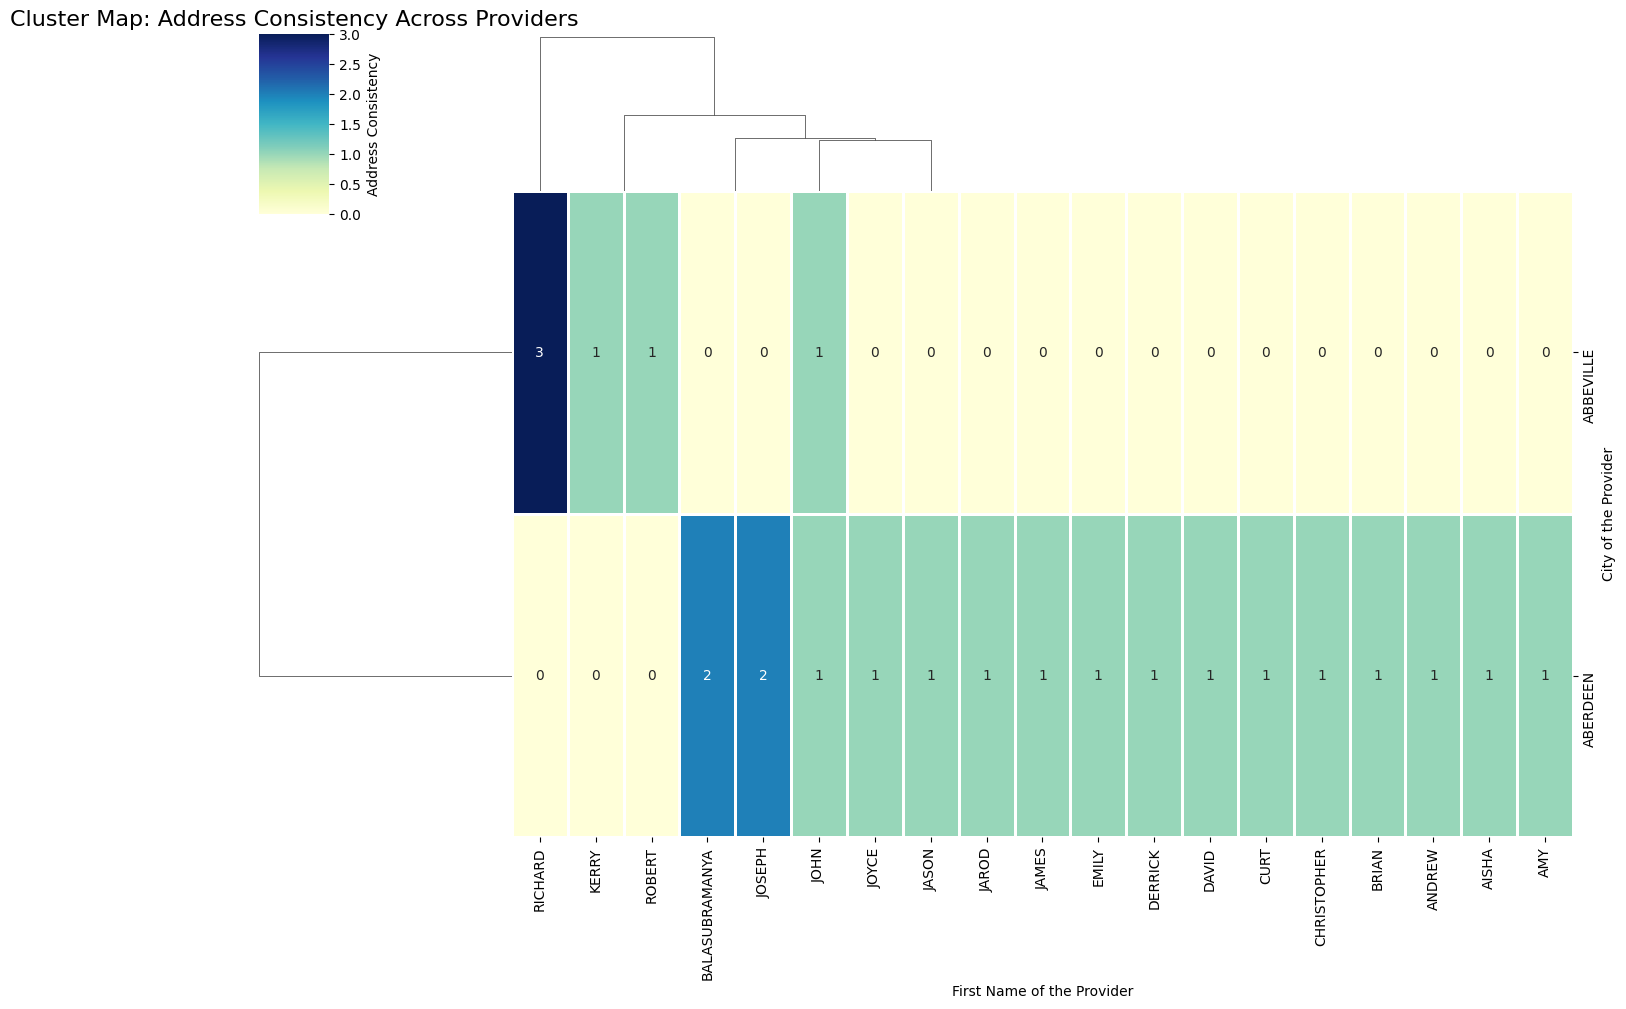

In [61]:
# Constructing address_consistency DataFrame from the original dataset
address_consistency = df.groupby(["City of the Provider", "First Name of the Provider"]).size().reset_index(name='count')
address_consistency_subset = address_consistency.head(20).pivot(
    index="City of the Provider",
    columns="First Name of the Provider",
    values="count"
).fillna(0)

# Cluster map with the subset data
sns.clustermap(
    address_consistency_subset,
    cmap="YlGnBu",
    figsize=(14, 10),
    method='average',
    annot=True,
    linewidths=1,
    cbar_kws={'label': 'Address Consistency'}
)

plt.title("Cluster Map: Address Consistency Across Providers", fontsize=16)
plt.show()